In [1]:
import pandas as pd
import numpy as np
import pickle
pd.set_option('display.max_columns', None)

In [2]:
%%time
smileon = pd.read_pickle("../data/smileon.pkl")

Wall time: 273 ms


In [3]:
smileon.head(2)

,CallReportNum,ReportVersion,LinkedToCallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,PhoneWorkerNum,CityName,CountyName,StateProvince,CountryName,PostalCode,PhoneType,ThirdPartyStateProvince,Narrative,Feedback,EnteredByWorkerNum,EnteredOn,Reviewed,FeedbackStatus,FeedbackFromPhoneWorkerNum,FeedbackFromPhoneWorkerName,ReferralsMade,OrgNum,Demo_# of People in Household,Birth Year,Demo_Other Language,Notes (Optional) - Notes,OralCare_1351,OralCare_1354,OralCare_2140,OralCare_2150,OralCare_2160,OralCare_2161,OralCare_230,OralCare_2330,OralCare_2331,OralCare_2332,OralCare_2335,OralCare_2390,OralCare_2391,OralCare_2392,OralCare_2393,OralCare_2394,OralCare_2915,OralCare_2920,OralCare_2933,OralCare_2940,OralCare_2950,OralCare_2954,OralCare_2980,OralCare_3220,OralCare_4341,OralCare_4342,OralCare_6930,OralCare_6980,OralCare_7111,OralCare_7140,OralCare_7210,OralCare_7220,OralCare_7230,OralCare_7240,OralCare_7241,OralCare_7250,OralCare_7261,OralCare_7286,OralCare_7310,OralCare_7311,OralCare_7320,OralCare_7321,OralCare_7410,OralCare_7411,OralCare_7471,OralCare_7510,OralCare_7971,OralCare_7972,OralCare_9110,OralCare_9951,OralCare_Lab Assist narrative,Screen_Last Screening Date,VOE_Verification Date,Baseline_Are you limited in what you can eat?,Baseline_Dental Clinic,Baseline_Did the client commit to referral?,Baseline_Did you help in these other areas?,Baseline_Do you need help in these other areas?,Baseline_Have you ever felt that the appearance of your mouth and teeth affected your quality of life?,Baseline_How would you describe the condition of your mouth and teeth?,Baseline_What is the next step for client encounter?,Baseline_What is the next step for clients encounter?,CM_Dental Clinic,CM_Transportation Barriers,CM_What barriers have kept you from finding a consistent dental home? (Select all that apply),CM_What is the outcome for the client?,Clinic_Action: Upload Before Picture on Finish Tab,Clinic_Is patient of record date if yes last seen?,Clinic_Was initial appointment made?,Clinic_Was initial transportation assistance or referral provided?,Demo_Gender,Demo_Household Income Level,Demo_How did you first hear about the program?,Demo_Preferred Language/Language Needed,Demo_Race/Ethnicity,Demo_What other assistance programs are you on?,Demo_When is the last time you visited your dentist?,OralCare_What care was provided to the enrollee? (Select all that apply),PElig_Dental Insurance?,PElig_Do they pre-qualify for SMILE ON 60+?,"PElig_What is the next step for clients encounter, A?","PElig_What is the next step for clients encounter, B?",Screen_# of Lower Natural Teeth,Screen_# of Upper Natural Teeth,Screen_Do you have removable dentures?,Screen_Do you usually wear your denture(s) when you eat?,Screen_Experienced any problems related to mouth/teeth during past 12 months?,Screen_How often do you brush your teeth?,Screen_Need for Periodontal Care,Screen_Root Fragments,Screen_Suspicious Soft Tissue Lesions,Screen_Treatment Urgency,Screen_Untreated Decay,Site_Enroller ID,Site_Enroller Location,TPlan_Action: Upload After Picture on Finish Tab,TPlan_Is the treatment plan completed?,TPlan_Was a treatment plan developed?,"TPlan_Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)",VOE_Transportation Arranged,VOE_Verification of Eligibility
0,93115324,SMILE ON 60+ Registration,NaN,9/30/2021 16:56,9/30/2021 16:57,1,3638169,123747,Smyrna,Rutherford,TN,United States,37167.0,Mobile,NaN,spoke with client again concerning transfer to...,NaN,123747,9/30/2021 16:57,No,Not yet,NaN,NaN,NaN,51426,1.0,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Interfaith Dental Clinic - Murfreesboro,Yes,NaN,No,Yes,Poor,NaN,Referred to dental clinic,NaN,NaN,No insurance,NaN,NaN,NaN

**Creating a subset dataframe based on columns chosen by group Get Tootha Choppa (gtc) to determine success of program outcomes

In [4]:
gtc =smileon[['CallReportNum', 'CallerNum', 'ReferralsMade', 'Screen_Last Screening Date', 
             'Baseline_Are you limited in what you can eat?', 'Baseline_Did the client commit to referral?', 
             'Baseline_Have you ever felt that the appearance of your mouth and teeth affected your quality of life?', 
             'Baseline_How would you describe the condition of your mouth and teeth?', 
             'CM_What is the outcome for the client?', 'Clinic_Was initial appointment made?', 
             'Screen_Experienced any problems related to mouth/teeth during past 12 months?', 
             'TPlan_Is the treatment plan completed?', 
             'TPlan_Was a treatment plan developed?',
             'TPlan_Was the enrollee able to be restored to function (can chew) and "social six" esthetics (top front six teeth are present and disease free)' ]]

In [5]:
gtc.head(2)

,CallReportNum,CallerNum,ReferralsMade,Screen_Last Screening Date,Baseline_Are you limited in what you can eat?,Baseline_Did the client commit to referral?,Baseline_Have you ever felt that the appearance of your mouth and teeth affected your quality of life?,Baseline_How would you describe the condition of your mouth and teeth?,CM_What is the outcome for the client?,Clinic_Was initial appointment made?,Screen_Experienced any problems related to mouth/teeth during past 12 months?,TPlan_Is the treatment plan completed?,TPlan_Was a treatment plan developed?,"TPlan_Was the enrollee able to be restored to function (can chew) and ""social six"" esthetics (top front six teeth are present and disease free)"
0,93115324,3638169,NaN,NaN,Yes,Yes,Yes,Poor,NaN,NaN,NaN,NaN,NaN,NaN
1,93115188,4431194,NaN,NaN,Yes,Yes,Yes,Poor,NaN,NaN,NaN,NaN,NaN,NaN


**Exploration of data to see values in gtc dataframe columns

In [6]:
gtc['CallReportNum'].nunique()

57860

In [7]:
gtc['CallerNum'].nunique() #10,000 callers for 57,000 rows of dta

10711

In [8]:
#gtc['Screen_Last Screening Date'].unique() #DO I NEED TO CALCULATE NUMBER OF DAYS BETWEEN CALL AND LAST SCREENING DATE

In [9]:
gtc['Baseline_Are you limited in what you can eat?'].unique()

array(['Yes', 'No', nan], dtype=object)

In [10]:
gtc['Baseline_How would you describe the condition of your mouth and teeth?'].unique()

array(['Poor', 'Good', 'Fair', 'Dont know', nan, 'Very Good'],
      dtype=object)

In [11]:
gtc['CM_What is the outcome for the client?'].unique()

array([nan, 'Navigation to dental clinic for dental exam and treatment',
       'Enrolled in Wisdom Tooth Project Workshop'], dtype=object)

In [12]:
gtc['TPlan_Is the treatment plan completed?'].value_counts()

No     19382
Yes     7823
Name: TPlan_Is the treatment plan completed?, dtype: int64

In [13]:
gtc['Screen_Experienced any problems related to mouth/teeth during past 12 months?'].unique()

array([nan,
       'Difficulty when biting or chewing foods; Experienced pain or discomfort',
       'Difficulty when biting or chewing foods; Difficulty with speech or pronouncing words; Experienced pain or discomfort',
       'Difficulty when biting or chewing foods; Difficulty with speech or pronouncing words; Avoided smiling',
       'Felt anxiety; Avoided smiling',
       'Difficulty when biting or chewing foods; Felt anxiety; Experienced pain or discomfort',
       'Difficulty when biting or chewing foods; Difficulty with speech or pronouncing words; Dry mouth; Felt anxiety; Felt embarrassement; Avoided smiling',
       'Difficulty when biting or chewing foods; Felt anxiety; Felt embarrassement; Avoided smiling; Experienced pain or discomfort',
       'Difficulty when biting or chewing foods',
       'Difficulty when biting or chewing foods; Difficulty with speech or pronouncing words; Dry mouth; Felt anxiety; Felt embarrassement; Avoided smiling; Experienced pain or discomfort',

In [14]:
gtc['TPlan_Was the enrollee able to be restored to function (can chew) and "social six" esthetics (top front six teeth are present and disease free)'].value_counts()

No     12260
Yes     9794
Name: TPlan_Was the enrollee able to be restored to function (can chew) and "social six" esthetics (top front six teeth are present and disease free), dtype: int64

In [15]:
gtc['Clinic_Was initial appointment made?'].unique()

array([nan, 'Yes', 'No'], dtype=object)

In [16]:
gtc['Clinic_Was initial appointment made?'].value_counts()


Yes    5614
No       93
Name: Clinic_Was initial appointment made?, dtype: int64

In [17]:
gtc.describe()

,CallReportNum,CallerNum
count,5.786000e+04,5.786000e+04
mean,7.417346e+07,3.080123e+06
std,1.086493e+07,5.901309e+05
min,5.319245e+07,-2.000000e+00
25%,6.541199e+07,2.633308e+06
50%,7.156906e+07,2.891609e+06
75%,8.423162e+07,3.496070e+06
max,9.350847e+07,4.581581e+06


**Creating a filtered dataframe to show only the rows where a clinic appointment was made

In [18]:
filt_appt = (gtc['Clinic_Was initial appointment made?'] == 'Yes')
gtc[filt_appt].shape # or gtc.loc[filt] or df.loc[filt, 'column_name']

(5614, 14)

In [19]:
gtc.loc[~filt_appt].shape #shows all row that do not meet filt_appt criteria, that is where a clinic appt was not made 

(52246, 14)

**Creating a filtered dataframe to show only the rows where a treatment plan was developed

In [20]:
filt_tpd = (gtc['TPlan_Was a treatment plan developed?'] == 'Yes')
gtc[filt_tpd].shape

(24526, 14)

**Creating a filtered dataframe to show only the rows where a treatment plan was completed

In [21]:
filt_tpc = (gtc['TPlan_Is the treatment plan completed?'] == 'Yes')
gtc[filt_tpc].shape

(7823, 14)

In [22]:
#filt_combo = filt_appt & filt_tpd #& filt_tpc
#filt_combo.shape

In [23]:
gtc.loc[filt_appt, 'TPlan_Was a treatment plan developed?']

49       Yes
67       Yes
71       Yes
95       Yes
115      Yes
        ... 
57711     No
57723    NaN
57748    NaN
57760    NaN
57792    NaN
Name: TPlan_Was a treatment plan developed?, Length: 5614, dtype: object

**Creating a filtered dataframe to show only the rows where both an appointment was made and a treatment plan was developed

In [24]:
filt_appt_tpd = (gtc['Clinic_Was initial appointment made?'] == 'Yes') & (gtc['TPlan_Was a treatment plan developed?'] == 'Yes')
filt_appt_tpd.value_counts()

False    53179
True      4681
dtype: int64

**Creating a filtered dataframe to show only the rows where:
    1. an appointment was made 2. a treatment plan was developed and 3. a treatment plan was completed

In [25]:
filt_appt_tpd_tpc= (gtc['Clinic_Was initial appointment made?'] == 'Yes') & (gtc['TPlan_Was a treatment plan developed?'] == 'Yes') & (gtc['TPlan_Is the treatment plan completed?'] == 'Yes')
filt_appt_tpd_tpc.value_counts()

False    57175
True       685
dtype: int64

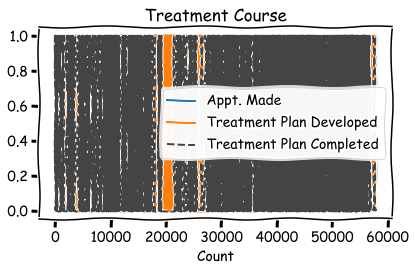

In [31]:
from matplotlib import pyplot as plt
plt.xkcd()
plt.plot(filt_appt, label='Appt. Made')
plt.plot(filt_appt_tpd, label='Treatment Plan Developed')
plt.plot(filt_appt_tpd_tpc, color='#444444', linestyle='--', label='Treatment Plan Completed')
plt.xlabel('Count')

plt.title('Treatment Course')

plt.legend()

plt.tight_layout()



plt.show()


**To review selected columns (TPlan_Was a treatment plan developed?, TPlan_Is the treatment plan completed?) of the filltered dataframe filt_appt

In [32]:
gtc.loc[filt_appt_tpd_tpc, ['TPlan_Was a treatment plan developed?', 'TPlan_Is the treatment plan completed?']]

,TPlan_Was a treatment plan developed?,TPlan_Is the treatment plan completed?
49,Yes,Yes
95,Yes,Yes
158,Yes,Yes
172,Yes,Yes
298,Yes,Yes
...,...,...
56372,Yes,Yes
56682,Yes,Yes
56693,Yes,Yes
56751,Yes,Yes


**Creating a new variabe to extract only 'Poor and  'Don't know' responses about the condition of mouth and teeth?

In [ ]:
#pivot_filt_appt_tpd_tpc = pd.pivot_table (data=filt_appt_tpd_tpc, index= ['CallerNum', 'CM_What is the outcome for the client?'])
#pivot_filt_appt_tpd_tpc.head(2)

In [62]:
baseline = ('Poor', 'Dont know')

In [63]:
filt_baseline = gtc['Baseline_How would you describe the condition of your mouth and teeth?'].isin(baseline)
filt_baseline

0         True
1         True
2        False
3        False
4         True
         ...  
57855    False
57856     True
57857    False
57858    False
57859     True
Name: Baseline_How would you describe the condition of your mouth and teeth?, Length: 57860, dtype: bool

In [64]:
gtc.loc[filt_baseline, 'Baseline_How would you describe the condition of your mouth and teeth?']

0             Poor
1             Poor
4             Poor
5        Dont know
6             Poor
           ...    
57842    Dont know
57846    Dont know
57851         Poor
57856         Poor
57859         Poor
Name: Baseline_How would you describe the condition of your mouth and teeth?, Length: 25575, dtype: object

In [69]:
filt_appt_tpd_tpc_bl= (gtc['Clinic_Was initial appointment made?'] == 'Yes') & (gtc['TPlan_Was a treatment plan developed?'] == 'Yes') & (gtc['TPlan_Is the treatment plan completed?'] == 'Yes') & filt_baseline
filt_appt_tpd_tpc_bl.value_counts()

False    57666
True       194
dtype: int64

In [68]:
filt_appt_tpd_tpc_bl=[filt_appt_tpd_tpc, filt_baseline]
filt_appt_tpd_tpc_bl

[0        False
 1        False
 2        False
 3        False
 4        False
          ...  
 57855    False
 57856    False
 57857    False
 57858    False
 57859    False
 Length: 57860, dtype: bool,
 0         True
 1         True
 2        False
 3        False
 4         True
          ...  
 57855    False
 57856     True
 57857    False
 57858    False
 57859     True
 Name: Baseline_How would you describe the condition of your mouth and teeth?, Length: 57860, dtype: bool]

In [ ]:
#gtc.loc[baseline1, 'Baseline_How would you describe the condition of your mouth and teeth?']

In [ ]:
#filt_appt_tpd_tpc.loc[filt_baseline, 'Baseline_How would you describe the condition of your mouth and teeth?']

In [ ]:
pivot_gtc = pd.pivot_table (data=gtc, index=['CallerNum', 'CM_What is the outcome for the client?'])
pivot_gtc.head(2)